In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=8402529555c954358f2a82058663c893878f4c86534216f30a193c225efa7b5b
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
!wget https://raw.githubusercontent.com/bamartin1618/DS_CC_Dataset/main/bank_note_data.csv

--2023-05-13 21:32:55--  https://raw.githubusercontent.com/bamartin1618/DS_CC_Dataset/main/bank_note_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45088 (44K) [text/plain]
Saving to: ‘bank_note_data.csv’

bank_note_data.csv  100%[===================>]  44.03K  --.-KB/s    in 0.007s  

2023-05-13 21:32:55 (6.21 MB/s) - ‘bank_note_data.csv’ saved [45088/45088]



In [ ]:
bank = pd.read_csv('bank_note_data.csv')

print(bank.size)
bank.dropna(axis=0, inplace =True)
bank.describe().T


6860


,count,mean,std,min,25%,50%,75%,max
Image.Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Image.Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Image.Curt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


# PLOTS AND UNDERSTANDING THE DATA

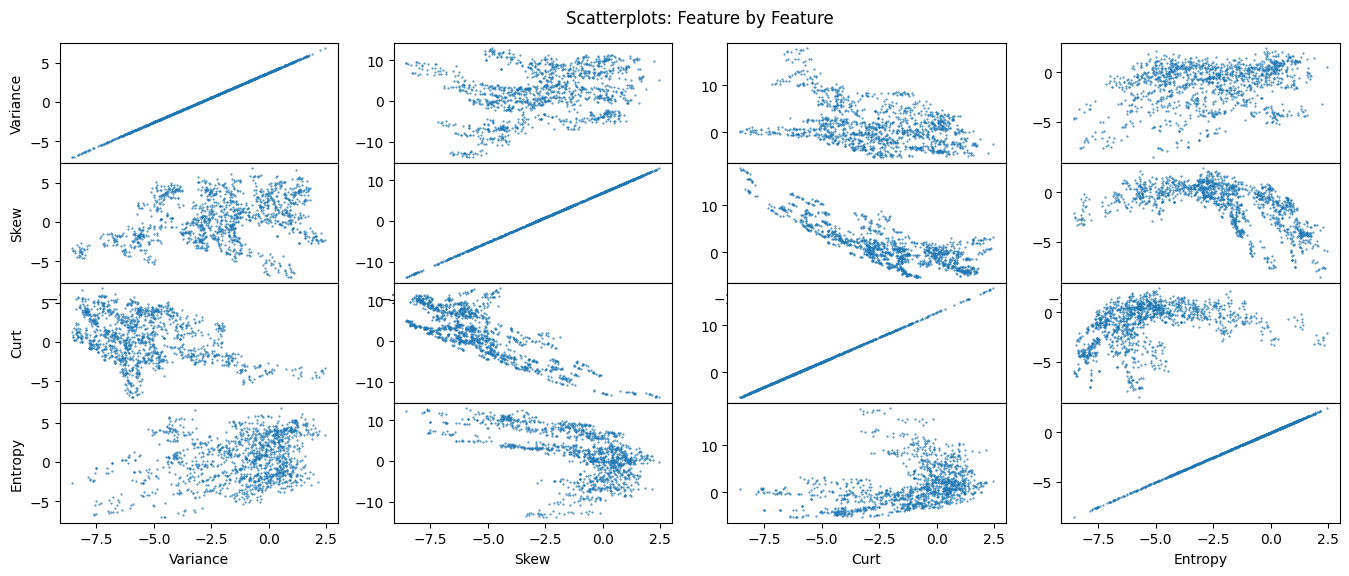

In [ ]:
columns = ['Variance', 'Skew', 'Curt', 'Entropy']

# iterate through each collumns 0-3 to create 
fig, axs = plt.subplots(4, 4)

for i in [0, 1, 2, 3]:
  x_label = columns[i]
  for j in [0, 1, 2, 3]:
    y_label = columns[j]
    axs[i, j].scatter(bank.iloc[:, i], bank.iloc[:, j], s = .2)
    axs[j, i].set(xlabel=x_label)
    axs[i, 0].set(ylabel=x_label)
plt.subplots_adjust(left=1,
                    bottom=2,
                    right=3,
                    top=3,
                    wspace=.2,
                    hspace=0)
plt.suptitle("Scatterplots: Feature by Feature", x=2, y=3.07)
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

fig = make_subplots(rows=4, cols=4)
col = bank.columns

for i in [0, 1, 2, 3]:
  x_label = col[i]
  for j in [0, 1, 2, 3]:
    y_label = col[j]
    fig.add_trace(
      go.Scatter(x=bank[x_label], y=bank[y_label], mode="markers", name=x_label),
      row=i+1, col=j+1
    )


fig.update_layout(height=600, width=800, title_text="Scatterplot: Features in relation to GDP")
fig.show()

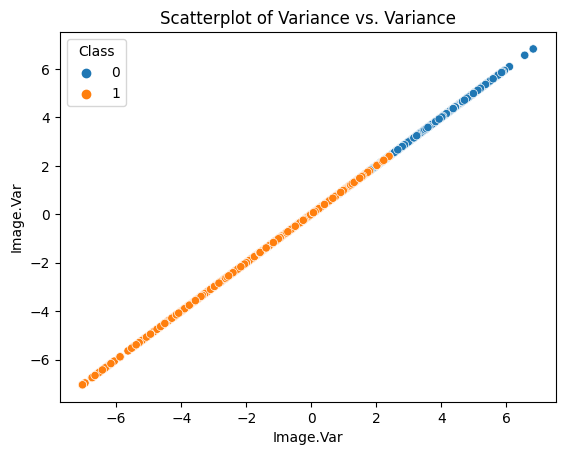

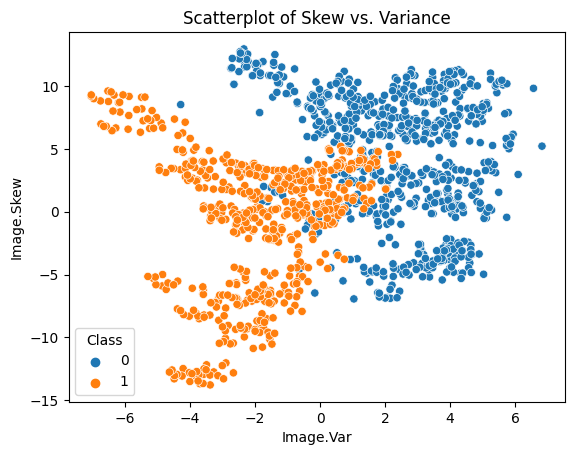

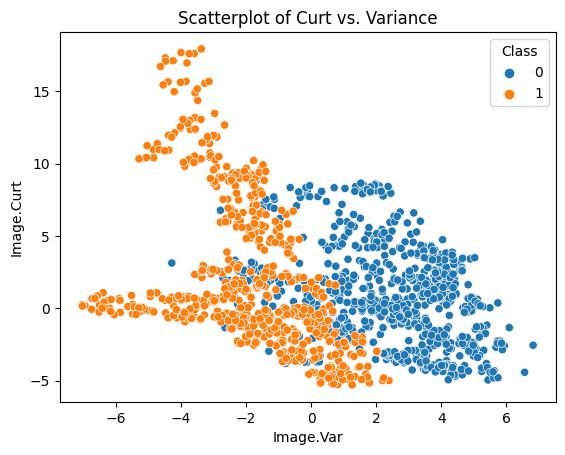

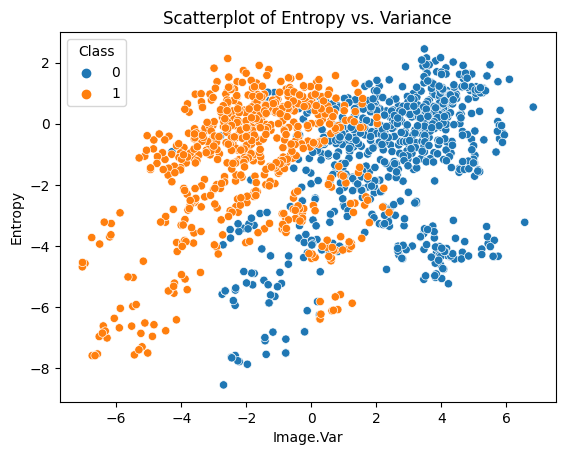

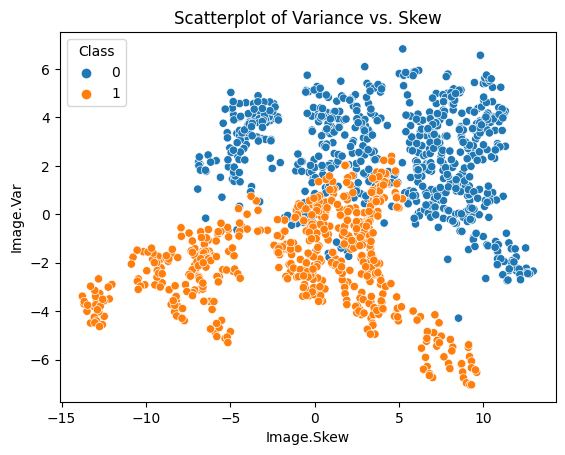

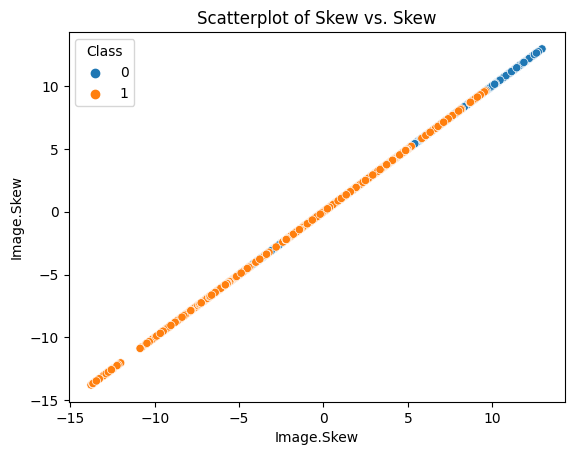

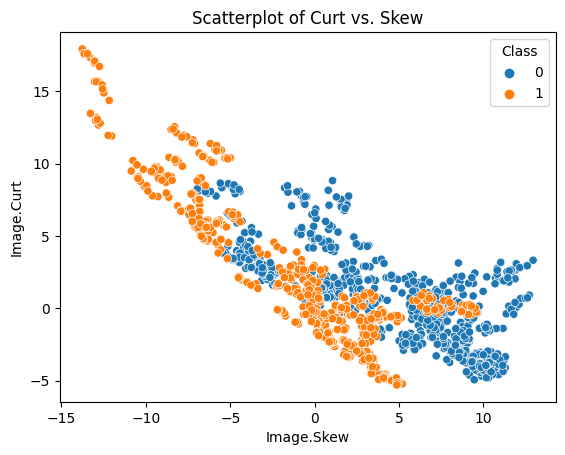

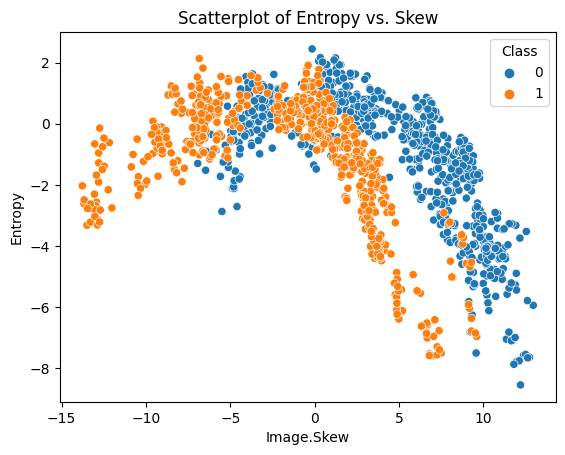

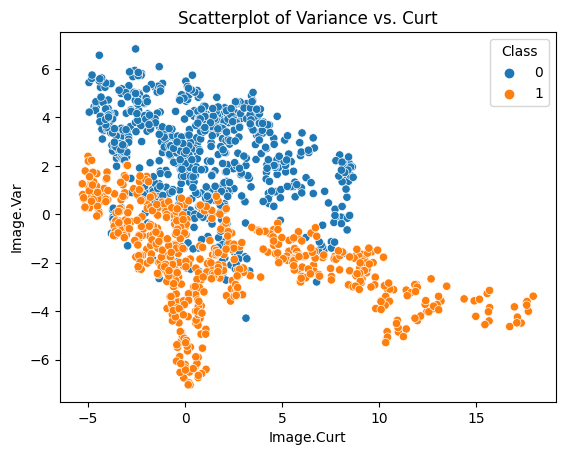

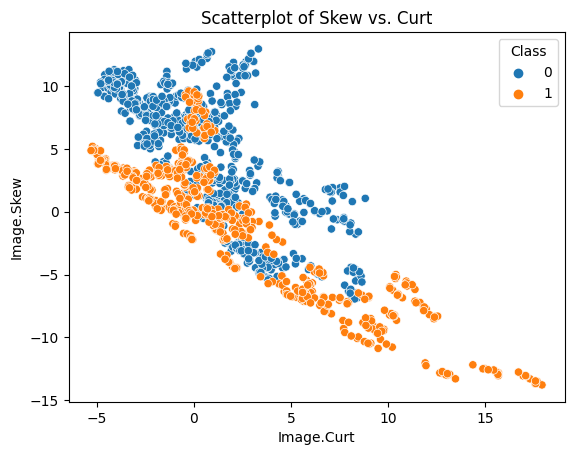

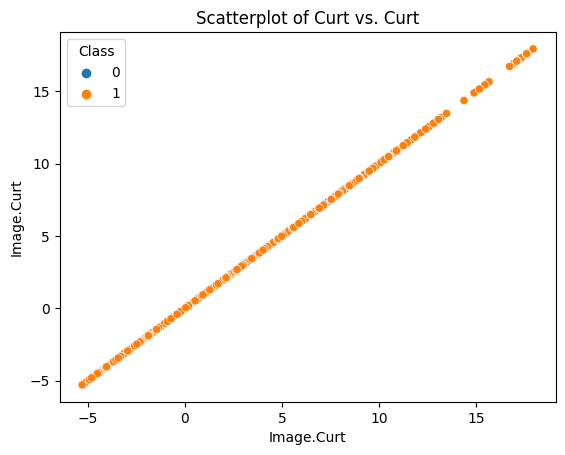

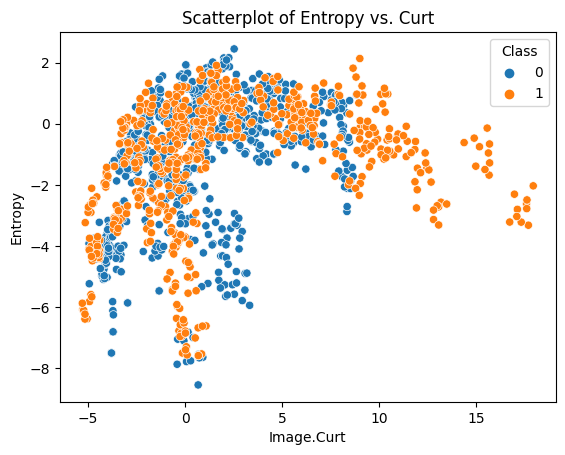

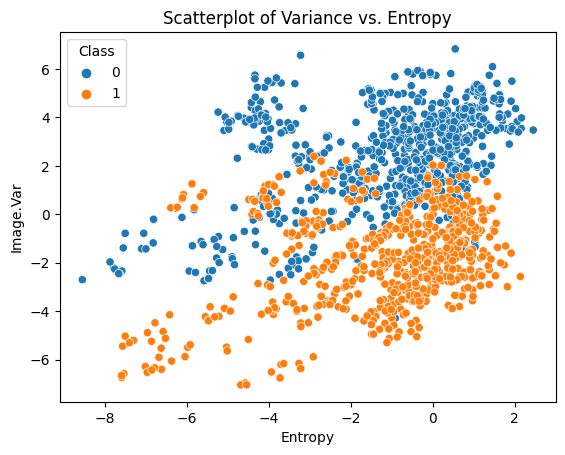

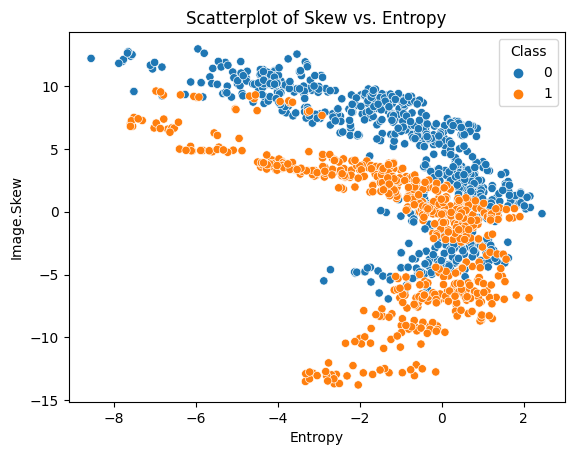

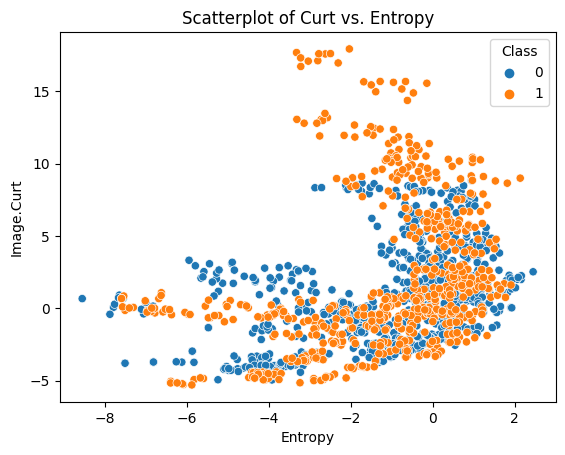

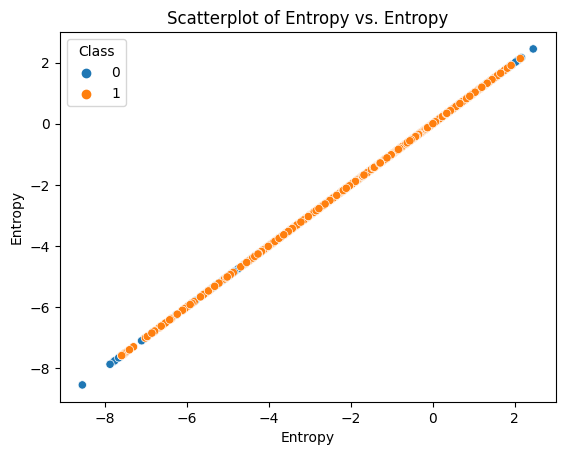

In [ ]:
columns = bank.columns
label = ["Variance", "Skew", "Curt", "Entropy"]
# iterate through each collumns 0-3 to create 

for i in range(0, 4):
  x_label = columns[i]
  for j in range(0, 4):
    y_label = columns[j]
    sns.scatterplot(data=bank, x=columns[i], y=columns[j], hue='Class',legend='auto')
    plt.title(f"Scatterplot of {label[j]} vs. {label[i]}")
    plt.show()



<Axes: >

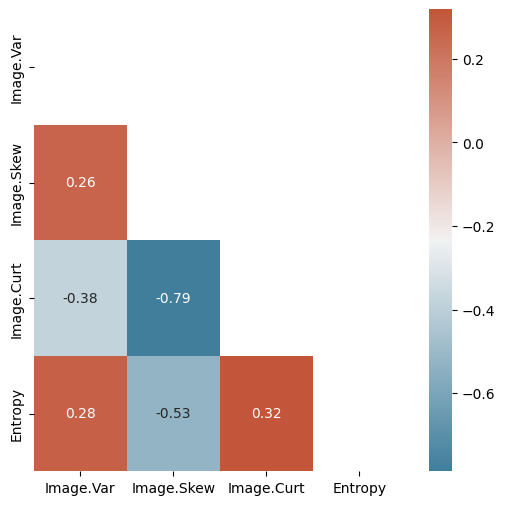

In [ ]:
import plotly.express as px
columns = bank.columns
data = bank.iloc[:, :4]
#
# Correlation between different variables
#
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(6, 6))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


# TRAINING MODELS

We will be using XGBoost to train this dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.98      1.00      0.99        54

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

[[83  1]
 [ 0 54]]


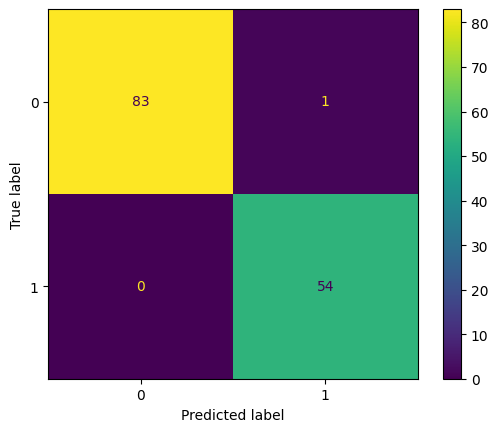

In [ ]:
train_df, test_df = train_test_split(bank, train_size=.90, shuffle=True);

train_features, train_class = train_df.iloc[:, :4], train_df.iloc[:, 4]
test_features, test_class = test_df.iloc[:, :4], test_df.iloc[:, 4]

XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0).fit(train_features, train_class)
predicted_XGB = XGB.predict(test_features)

report_XGB = classification_report(test_class.to_numpy(), predicted_XGB)
print(report_XGB)
confusion_XGB = confusion_matrix(test_class.to_numpy(), predicted_XGB)
print(confusion_XGB)

disp = ConfusionMatrixDisplay(confusion_XGB, display_labels=XGB.classes_)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        54

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

[[84  0]
 [ 0 54]]


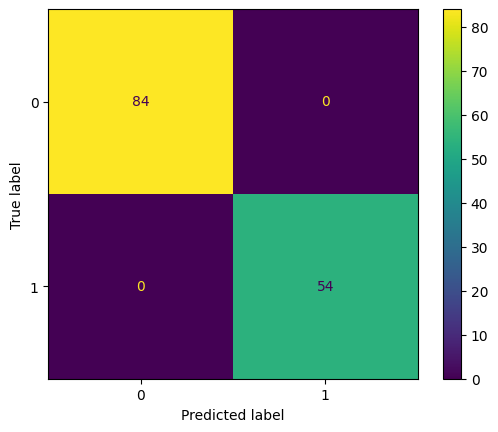

In [ ]:
MLP = MLPClassifier(max_iter=300, early_stopping=False).fit(train_features, train_class)
predicted_MLP = MLP.predict(test_features)

report_MLP = classification_report(test_class.to_numpy(), predicted_MLP)
print(report_MLP)
confusion_MLP = confusion_matrix(test_class.to_numpy(), predicted_MLP)
print(confusion_MLP)

disp = ConfusionMatrixDisplay(confusion_MLP, display_labels=MLP.classes_)
disp.plot()